# Zeeman

In [1]:
import os
import k3d
import random
import discretisedfield as df
import micromagneticmodel as mm
import micromagneticdata as md
import oommfc as oc

p1 = (-15e-9, 0, 0)
p2 = (15e-9, 1e-9, 1e-9)
n = (20, 1, 1)

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

Ms = 1e6
H = (0, 0, 1e6)

random.seed(2)
def value_random(point):
    m = [random.random()*2 - 1 for i in range(3)]
    return m

system = mm.System(name='zeeman')
system.energy = mm.Zeeman(H=H)
system.dynamics = mm.Damping(alpha=0.5)  # No precession to make animations faster
system.m = df.Field(mesh, dim=3, value=value_random, norm=Ms)

print(f'Average m: {system.m.orientation.average}')

try:
    oc.delete(system)
except FileNotFoundError:
    pass

td = oc.TimeDriver()
td.drive(system, t=70e-12, n=10)  # The aim is to have 10s videos n=10*25=250

print(f'Average m: {system.m.orientation.average}')

system.m.k3d_vector()

Average m: (0.029446643985358817, 0.1980192257812389, 0.092294633582277)
Running OOMMF (ExeOOMMFRunner) [2021/06/12 21:58]... (1.4 s)
Average m: (0.0010556290137231869, 7.046444652827667e-05, 0.999968505994923)


Plot(antialias=3, axes=['x', 'y', 'z'], axes_helper=1.0, background_color=16777215, camera=[2, -3, 0.2, 0.0, 0…

Output()

In [2]:
import micromagneticdata as md
data=md.Data(system.name)
data.info

,drive_number,date,time,driver,t,n
0,0,2021-06-12,21:58:37,TimeDriver,7.000000e-11,10


## The following method requires additional installation of the celluloid package in the ubermag environment

MovieWriter PillowWriter unavailable; using Pillow instead.


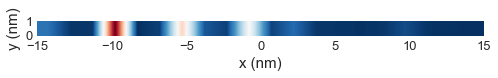

In [10]:
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np


# create figure object
fig = plt.figure()
# load axis box

ax = plt.axes()
# set axis limit
camera = Camera(fig)
for i in range(10):
    data[0][i].z.plane(z=0.5e-9).mpl_scalar(ax=ax,cmap='RdBu',filter_field=data[0][i].norm,colorbar=False,interpolation='bilinear',animated=True)
    camera.snap()
animation = camera.animate()

animation.save('test_1.gif', writer='PillowWriter', fps=5)

## The following methods can directly use matplotlib. It should be noted that frames cannot be greater than the n value in data[xx][n].

MovieWriter PillowWriter unavailable; using Pillow instead.


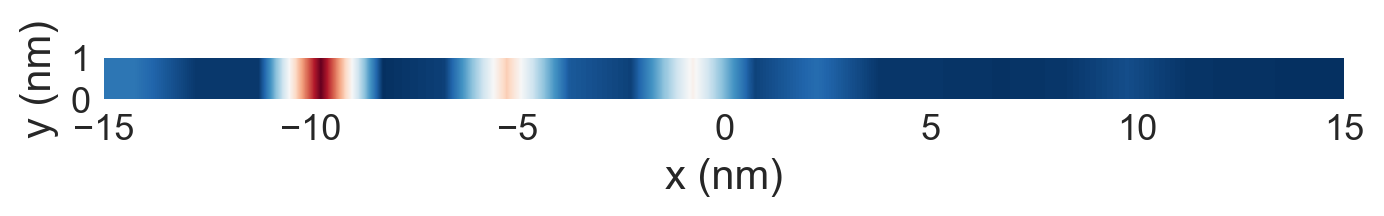

In [11]:
import numpy as np
import pandas as pd 
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from celluloid import Camera
fig = plt.figure(dpi=200)
ax = plt.axes()
def update1(i):
    t1=data[0][i].z.plane(z=0.5e-9).mpl_scalar(ax=ax,cmap='RdBu',filter_field=data[0][i].norm,colorbar=False,interpolation='bilinear',animated=True)
    return t1
ani = animation.FuncAnimation(fig, update1,frames=5, # The number of frames to generate the dynamic graph
                    interval=1000,  # Inter frame time interval, in ms
                    blit=False, # Make the output display faster
                    repeat=True)

ani.save("test_2.gif",writer='PillowWriter', fps=15)

In [2]:
data = md.Data(name=system.name)
drive = data[0]
plot = k3d.plot()


@df.interact(drive_number=data.selector(),
             timestep=drive.slider(continuous_update=False))
def my_plot(drive_number, timestep):
       data[drive_number][timestep].orientation.k3d_vector(plot=plot, interactive_field=system.m, head_size=3,points_size=0.5, points=False)
plot.display()


interactive(children=(BoundedIntText(value=0, description='drive', max=0), IntSlider(value=0, continuous_updat…

Output()

In [3]:
data[0].ovf2vtk()